<div>
<p style="text-align:center">
<img src="./src/logo DatosAbiertos.jpg">
</p>
</div>

# **Población Identificada con DNI mayor de edad por condición de donante de órganos**
### **Segundo Semestre - 2023**

In [45]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import zipfile
import os

### **Importar Dataset del Portal Nacional de Datos Abiertos**

In [2]:
data = pd.read_csv("./src/data/16_OPP_2023_Jun_donacion_0.csv", delimiter=",")
data.head()

,Residencia,Cod_continente,Continente,CodPais,Pais,UBIGEO_RENIEC,UBIGEO_INEI,Departamento,Provincia,Distrito,Sexo,Edad,Donacion,Cantidad
0,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,0,No Especificado,277
1,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,1,No Especificado,329
2,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,2,No Especificado,314
3,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,3,No Especificado,342
4,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,4,No Especificado,352


### **Importar Dataset Geográfico por Departamento del Perú**

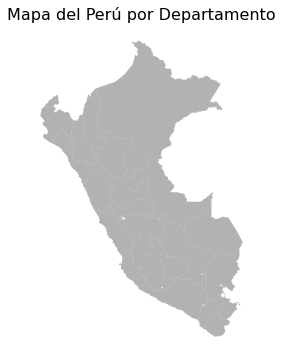

In [3]:
geodata = gpd.read_file('./src/geoData/DEPARTAMENTOS.shp')
fig, ax = plt.subplots(figsize = (8,6))
geodata.plot(ax = ax, color = 'gray', alpha = 0.6)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([])
plt.title("Mapa del Perú por Departamento", size = 16)
plt.show()

### **Importar Dataset Geo Espacial por Continente**

In [4]:
def descomprimirZip(archivo_zip, directorio_destino):
    try:
        with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
            zip_ref.extractall(directorio_destino)
            print(f'Archivo descomprimido correctamente en {directorio_destino}')
    except zipfile.BadZipFile as e:
        print(f'Error: No se pudo descomprimir el archivo. No es un archivo .zip válido')
    except Exception as e:
        print(f'Error: Ocurrió un error al descomprimir el archivo. {e}')

descomprimirZip("./src/geoDataWorld/continentes.zip", "./src/geoDataWorld/data/")

Archivo descomprimido correctamente en ./src/geoDataWorld/data/


In [5]:
world = gpd.read_file("./src/geoDataWorld/data/CONTINENTES MUNDO LIMITE BORDE geogpsperu suyopomalia.shp")
world

,OBJECTID,CONTINENT,SQMI,SQKM,Shape_Leng,Shape_Area,geometry
0,1.0,Africa,1.158346e+07,3.000115e+07,426.205882,2559.074473,"MULTIPOLYGON (((9.83850 37.14069, 9.86047 37.1..."
1,2.0,Antarctica,4.754809e+06,1.231495e+07,1587.027851,5998.481939,"MULTIPOLYGON (((-56.94641 -63.45050, -56.77649..."
2,3.0,Asia,1.731728e+07,4.485173e+07,2331.641623,5432.084963,"MULTIPOLYGON (((104.26270 77.68530, 104.33649 ..."
3,4.0,Australia,2.973612e+06,7.701651e+06,252.168372,695.539772,"MULTIPOLYGON (((142.51630 -10.85828, 142.50928..."
4,5.0,Europe,3.821854e+06,9.898597e+06,1598.034932,1444.717240,"MULTIPOLYGON (((10.97949 54.38068, 10.95831 54..."
5,7.0,Oceania,1.656787e+05,4.291076e+05,221.583327,42.565428,"MULTIPOLYGON (((172.86133 -40.50781, 172.98828..."
6,8.0,South America,6.856255e+06,1.775769e+07,622.552029,1539.313660,"MULTIPOLYGON (((-71.52863 12.44611, -71.27570 ..."
7,9.0,North America,9.339528e+06,2.418936e+07,3936.004945,3706.394031,"MULTIPOLYGON (((-92.50128 63.81592, -92.58380 ..."
8,13.0,NaN,NaN,NaN,17.769336,1.023761,"MULTIPOLYGON (((-60.92291 10.79730, -60.94440 ..."


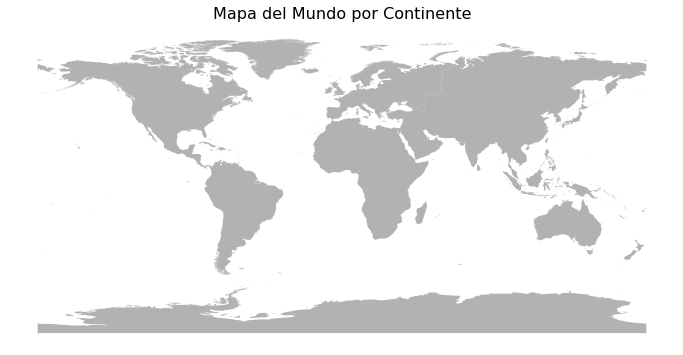

In [6]:
fig, ax = plt.subplots(figsize = (12,8))
world.plot(ax = ax, color = 'gray', alpha = 0.6)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([])
plt.title("Mapa del Mundo por Continente", size = 16)
plt.show()

## **Análisis Exploratorio de Datos - Parte I**

In [7]:
# Determinar si existen valores nulos
print(data.isnull().sum())
print("##########################")
print("No existen valores nulos")

Residencia        0
Cod_continente    0
Continente        0
CodPais           0
Pais              0
UBIGEO_RENIEC     0
UBIGEO_INEI       0
Departamento      0
Provincia         0
Distrito          0
Sexo              0
Edad              0
Donacion          0
Cantidad          0
dtype: int64
##########################
No existen valores nulos


In [8]:
# Revisar tipo de dato
data.dtypes

Residencia        object
Cod_continente     int64
Continente        object
CodPais            int64
Pais              object
UBIGEO_RENIEC     object
UBIGEO_INEI       object
Departamento      object
Provincia         object
Distrito          object
Sexo              object
Edad               int64
Donacion          object
Cantidad           int64
dtype: object

## **Análisis Exploratorio de Datos - Parte II**

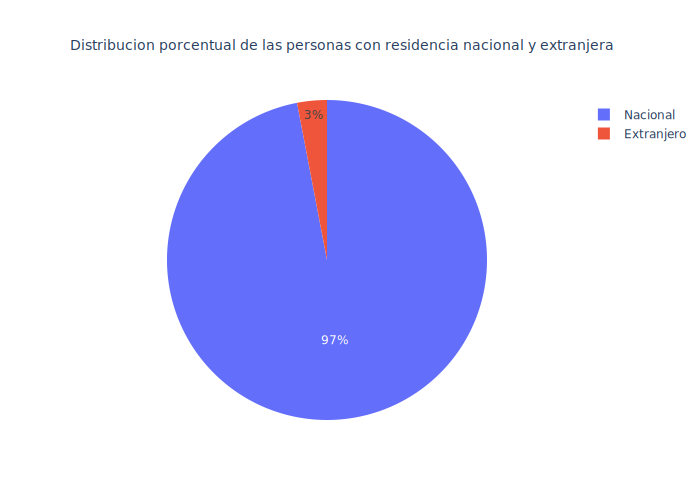

97% de las personas que están en el dataset por condición de donante de órganos tiene residencial nacional,
mientras que, el 3% tiene residencia extranjera.


In [86]:
df1 = pd.DataFrame(data.Residencia.value_counts().apply(lambda x : round(x / data.Residencia.count() * 100)))
df1 = df1.rename(columns = {'Residencia':'% Personas Residencia'})
fig = px.pie(df1, values="% Personas Residencia" ,names=df1.index,
             title = u'Distribucion porcentual de las personas con residencia nacional y extranjera')
fig.update_layout(title_font=dict(size=14), title_x=0.1)
fig.show('svg')
print('''97% de las personas que están en el dataset por condición de donante de órganos tiene residencial nacional,
mientras que, el 3% tiene residencia extranjera.''')

In [37]:
df2 = pd.DataFrame(data.Continente.value_counts().apply(lambda x : round(x / data.Continente.count()*100,2))).reset_index()
df2 = df2.append({'index':'South America','Continente':98.35}, ignore_index=True)
df2 = df2.rename(columns = {
    'Continente':'%',
    'index':'CONTINENT',
})
df2["CONTINENT"] = df2["CONTINENT"].replace({
    'América':'North America',
    'Europa':'Europe',
    'Oceanía':'Oceania',
    'África':'Africa',
})
df2_world = pd.merge(world, df2, on = 'CONTINENT', how = 'left').fillna(0)

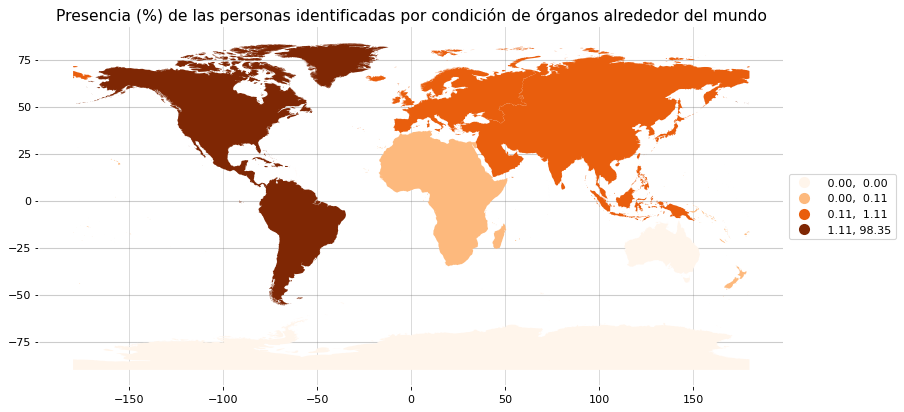


El 98.35% de las personas identificadas por condición de órganos se encuentran en el Norte y Sur
de América. Alrededor del 1% se encuentra en Europa y el 0.06% en Asia.


In [88]:
fig, ax = plt.subplots(figsize = (12,8), dpi = 80)
colors = cm.get_cmap('Oranges')
df2_world.plot(ax = ax, column = '%',scheme='QUANTILES', k=4, 
    cmap=colors,legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.grid(which='major',alpha=0.5)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.title('Presencia (%) de las personas identificadas por condición de órganos alrededor del mundo',
          size = 14)
plt.show()
print('''
El 98.35% de las personas identificadas por condición de órganos se encuentran en el Norte y Sur
de América. Alrededor del 1% se encuentra en Europa y el 0.06% en Asia.''')

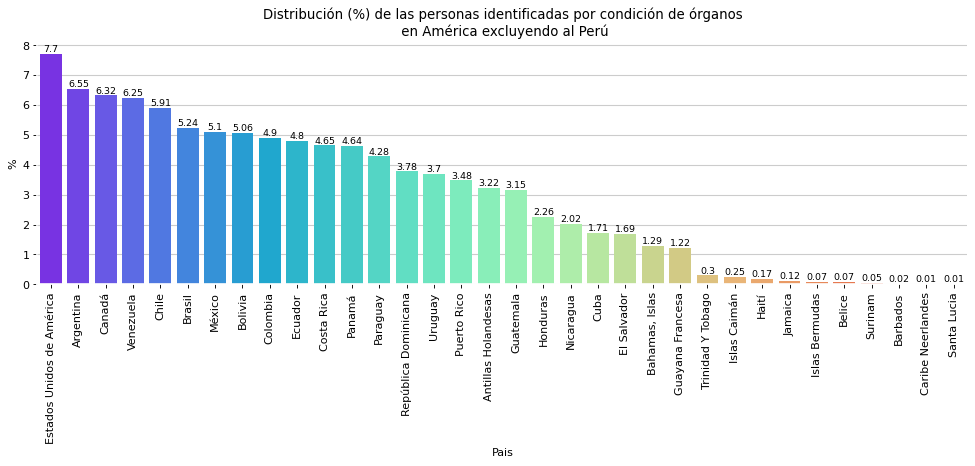


Teniendo como base inicial, el país de residencia filtrado solo por continente de América y excluyendo al Perú con
el objetivo de determinar cuál es el top de países con más peruanos. Estados Unidos de América es el país de América
del Norte que cuenta con el 7.7% de los peruanos residentes en ese país identificados por condición de órganos.



In [89]:
df3 = pd.DataFrame(data[(data["Continente"] == "América") & (data["Pais"] != "Perú")].groupby(['Pais']
        )['Residencia'].count()).sort_values("Residencia",
        ascending = False).rename(columns = {'Residencia':'%'})
df3["%"] = df3["%"].apply(lambda x : round(x/sum(df3["%"])*100,2))
fig, ax = plt.subplots(figsize = (15,4), dpi = 80)
sns.barplot(x = df3.index, y = df3["%"], ax = ax, palette='rainbow')
ax.bar_label(ax.containers[0], fontsize=8.5)
plt.xticks(rotation=90, size=10)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.title("Distribución (%) de las personas identificadas por condición de órganos\n en América excluyendo al Perú")
plt.show()
print(f'''
Teniendo como base inicial, el país de residencia filtrado solo por continente de América y excluyendo al Perú con
el objetivo de determinar cuál es el top de países con más peruanos. Estados Unidos de América es el país de América
del Norte que cuenta con el 7.7% de los peruanos residentes en ese país identificados por condición de órganos.
''')